In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
hours = pd.read_csv('hour.csv', low_memory=False)
days = pd.read_csv('day.csv', low_memory=False)

In [4]:
days.head(100)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,1/1/2011,1.0,0.0,1.0,0.0,6.0,0.0,2.0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,2.0,1/2/2011,1.0,0.0,1.0,0.0,0.0,0.0,2.0,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,3.0,1/3/2011,1.0,0.0,1.0,0.0,1.0,1.0,1.0,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,4.0,1/4/2011,1.0,0.0,1.0,0.0,2.0,1.0,1.0,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,5.0,1/5/2011,1.0,0.0,1.0,0.0,3.0,1.0,1.0,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96.0,4/6/2011,2.0,0.0,4.0,0.0,3.0,1.0,1.0,16.024153,19.38040,47.0833,17.625221,413.0,2395.0,2808.0
96,97.0,4/7/2011,2.0,0.0,4.0,0.0,4.0,1.0,1.0,17.937500,21.68480,60.2917,10.874904,571.0,2570.0,3141.0
97,98.0,4/8/2011,2.0,0.0,4.0,0.0,5.0,1.0,2.0,13.769153,16.22395,83.6250,15.208464,172.0,1299.0,1471.0
98,99.0,4/9/2011,2.0,0.0,4.0,0.0,6.0,0.0,2.0,14.042500,17.07645,87.7500,8.916561,879.0,1576.0,2455.0


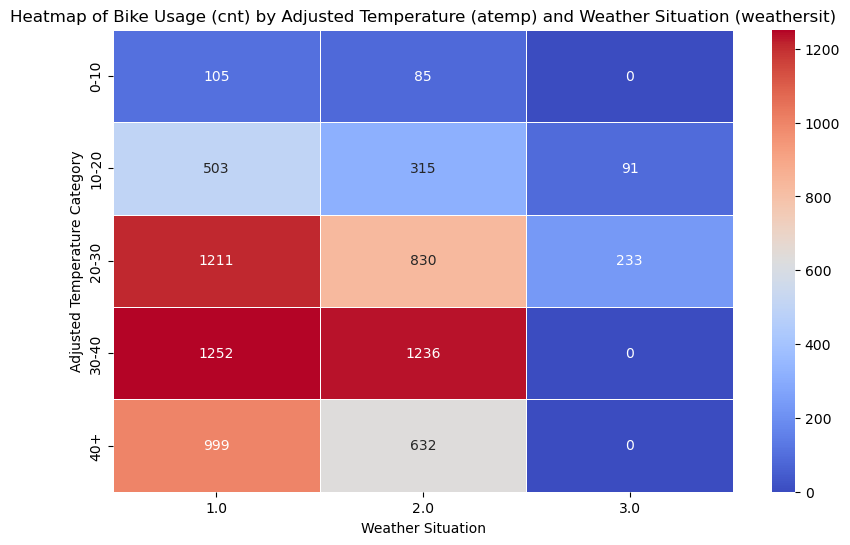

In [29]:
# Define the temperature bins with np.inf for the upper bound
bins = [0, 10, 20, 30, 40, np.inf]
labels = ['0-10', '10-20', '20-30', '30-40', '40+']
weather_atemp = days.copy()
weather_atemp['atemp_category'] = pd.cut(weather_atemp['atemp'], bins=bins, labels=labels, right=False)

# Create a pivot table with mean 'cnt' for each combination of 'weathersit' and 'atemp_category'
pivot_table = weather_atemp.pivot_table(values='casual', index='atemp_category', columns='weathersit', aggfunc='mean')
pivot_table.fillna(0, inplace=True)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Bike Usage (cnt) by Adjusted Temperature (atemp) and Weather Situation (weathersit)')
plt.xlabel('Weather Situation')
plt.ylabel('Adjusted Temperature Category')
plt.show()

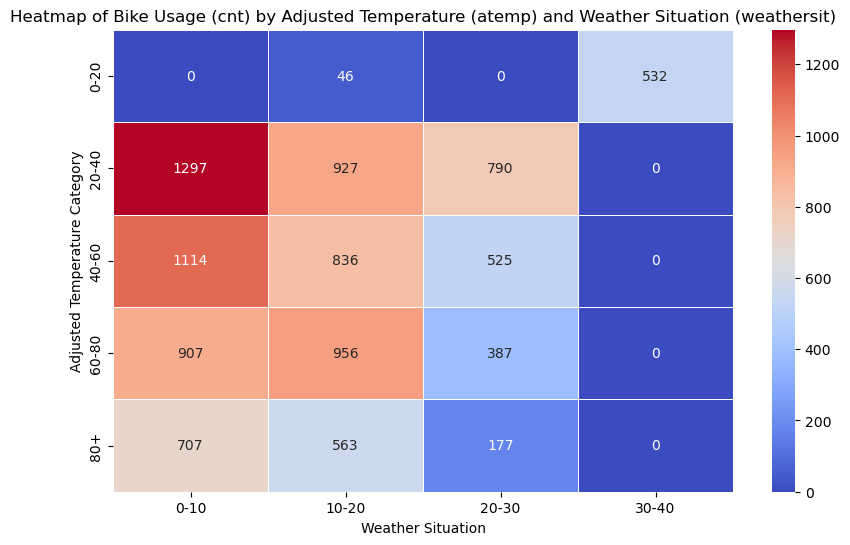

In [26]:
# Define the temperature bins with np.inf for the upper bound
bins_hum = [0, 20, 40, 60, 80, 100]
bins_wind = [0, 10, 20, 30, 40, np.inf]
labels_hum = ['0-20', '20-40', '40-60', '60-80', '80+']
labels_wind = ['0-10', '10-20', '20-30', '30-40', '40+']
hum_atemp = days.copy()
hum_atemp['hum_category'] = pd.cut(hum_atemp['hum'], bins=bins_hum, labels=labels_hum, right=False)
hum_atemp['windspeed_category'] = pd.cut(hum_atemp['windspeed'], bins=bins_wind, labels=labels_wind, right=False)

# Create a pivot table with mean 'cnt' for each combination of 'weathersit' and 'atemp_category'
pivot_table = hum_atemp.pivot_table(values='casual', index='hum_category', columns='windspeed_category', aggfunc='mean')
pivot_table.fillna(0, inplace=True)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Bike Usage (cnt) by Adjusted Temperature (atemp) and Weather Situation (weathersit)')
plt.xlabel('Weather Situation')
plt.ylabel('Adjusted Temperature Category')
plt.show()

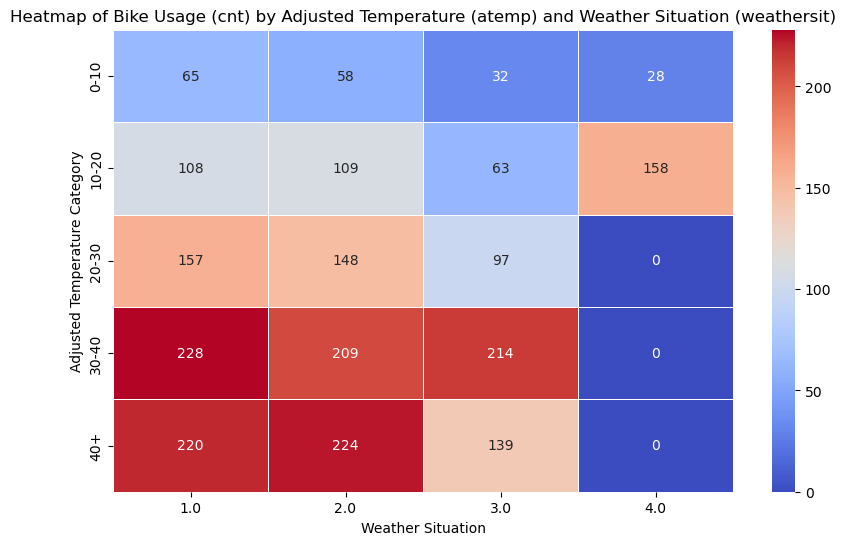

In [20]:
# Define the temperature bins with np.inf for the upper bound
bins = [0, 10, 20, 30, 40, np.inf]
labels = ['0-10', '10-20', '20-30', '30-40', '40+']
weather_atemp = hours.copy()
weather_atemp['atemp_category'] = pd.cut(weather_atemp['atemp'], bins=bins, labels=labels, right=False)

# Create a pivot table with mean 'cnt' for each combination of 'weathersit' and 'atemp_category'
pivot_table = weather_atemp.pivot_table(values='registered', index='atemp_category', columns='weathersit', aggfunc='mean')
pivot_table.fillna(0, inplace=True)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Bike Usage (cnt) by Adjusted Temperature (atemp) and Weather Situation (weathersit)')
plt.xlabel('Weather Situation')
plt.ylabel('Adjusted Temperature Category')
plt.show()

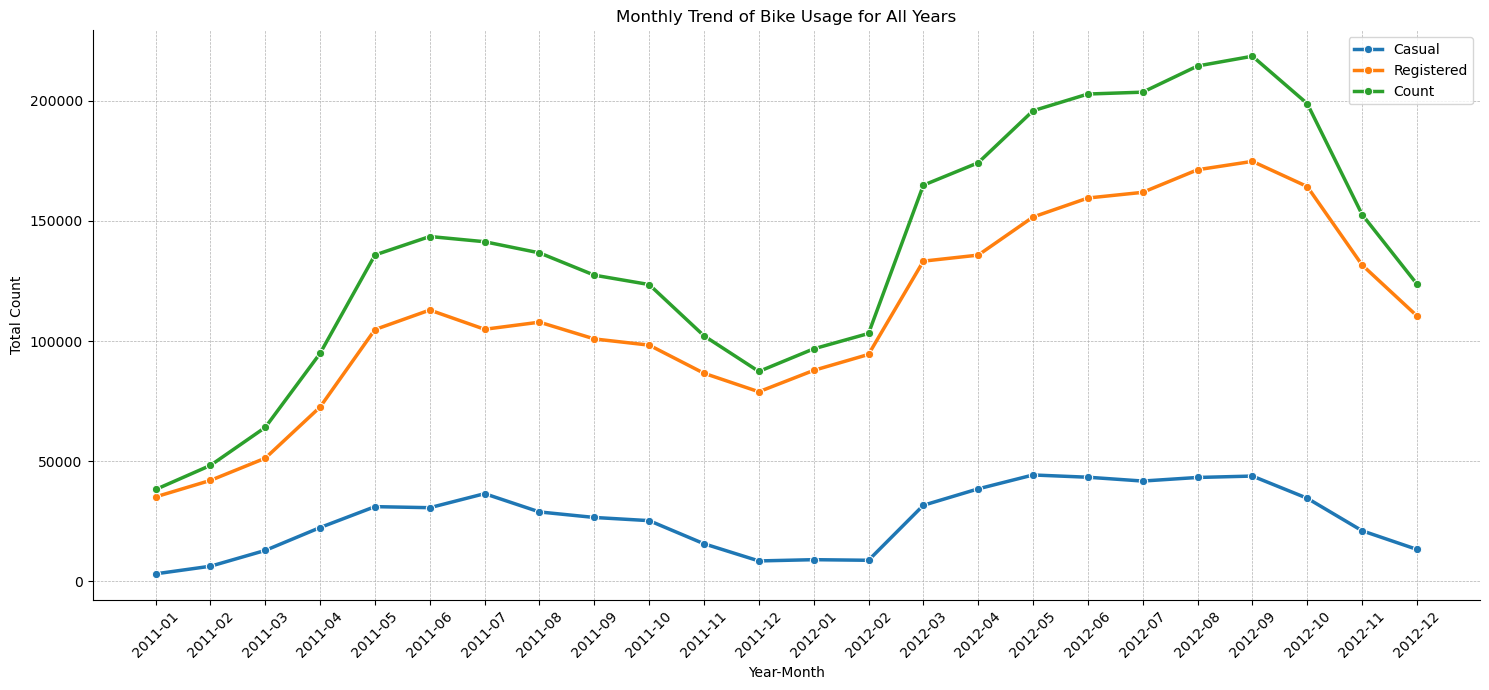

In [40]:
cnt_monthly = days.copy()
cnt_monthly['dteday'] = pd.to_datetime(cnt_monthly['dteday'])
cnt_monthly['year'] = cnt_monthly['dteday'].dt.year
cnt_monthly['month'] = cnt_monthly['dteday'].dt.month

# Group by year and month and aggregate the total counts
monthly_trends = cnt_monthly.groupby(['year', 'month']).agg({'casual': 'sum', 'registered': 'sum', 'cnt': 'sum'}).reset_index()

# Plotting the multi-line chart
plt.figure(figsize=(15, 7))

# Create a 'year_month' column for plotting that combines the year and month
monthly_trends['year_month'] = monthly_trends['year'] + (monthly_trends['month'] - 1) / 12

# Sort the DataFrame based on the new 'year_month' column to ensure correct plotting order
monthly_trends = monthly_trends.sort_values('year_month')

# Plotting lines for each category with seaborn for better visuals
sns.lineplot(x='year_month', y='casual', data=monthly_trends, marker='o', label='Casual', linewidth=2.5)
sns.lineplot(x='year_month', y='registered', data=monthly_trends, marker='o', label='Registered', linewidth=2.5)
sns.lineplot(x='year_month', y='cnt', data=monthly_trends, marker='o', label='Count', linewidth=2.5)

# Formatting the x-axis to show month and year
plt.xticks(monthly_trends['year_month'], [f'{int(year)}-{int(month):02d}' for year, month in zip(monthly_trends['year'], monthly_trends['month'])], rotation=45)
plt.xlabel('Year-Month')
plt.ylabel('Total Count')
plt.title('Monthly Trend of Bike Usage for All Years')
plt.legend()

# Show grid lines and set the background style
plt.grid(True, linestyle='--', linewidth=0.5)
sns.despine()  # Remove the top and right spines from plot

plt.tight_layout()  # Adjust layout to fit everything
plt.show()

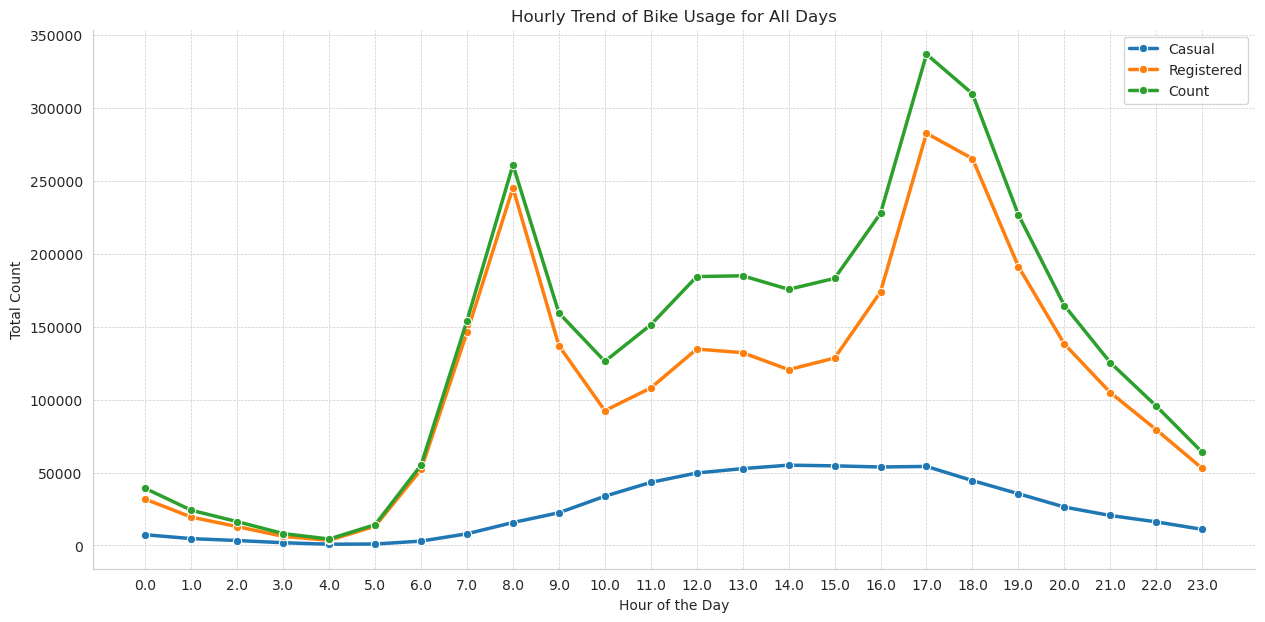

In [43]:
cnt_hourly = hours.copy()
hourly_trends = cnt_hourly.groupby('hr').agg({'casual': 'sum', 'registered': 'sum', 'cnt': 'sum'}).reset_index()

# Set the style of seaborn for more attractive plots
sns.set_style("whitegrid")

# Plotting the multi-line chart with seaborn for better aesthetics
plt.figure(figsize=(15, 7))

# Plotting lines for each category with seaborn for better visuals
sns.lineplot(x='hr', y='casual', data=hourly_trends, marker='o', label='Casual', linewidth=2.5)
sns.lineplot(x='hr', y='registered', data=hourly_trends, marker='o', label='Registered', linewidth=2.5)
sns.lineplot(x='hr', y='cnt', data=hourly_trends, marker='o', label='Count', linewidth=2.5)

# Formatting the x-axis to show hours
plt.xticks(hourly_trends['hr'], hourly_trends['hr'])
plt.xlabel('Hour of the Day')
plt.ylabel('Total Count')
plt.title('Hourly Trend of Bike Usage for All Days')
plt.legend()

# Show grid lines and set the background style
plt.grid(True, linestyle='--', linewidth=0.5)
sns.despine()  # Remove the